# **Task-4:Exploratory Data Analysis - Terrorism **

*GRIP : The Sparks Foundation (GRIP-July 2021)*

**Author -Ishan Ayus**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/GRIP/

/content/drive/MyDrive/GRIP


In [ ]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'Kill','targsubtype1_txt':'Target_Sub_Type',
     'nwound':'Wound'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,Latitude,Longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Targettype,targsubtype1,Target_Sub_Type,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,Kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data_df = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"Attacktype",'Kill',
               'Wound','target1','Targettype','Target_Sub_Type','Summary','Group','Weapon','motive']]
data_df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,target1,Targettype,Target_Sub_Type,Summary,Group,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Private Citizens & Property,Named Civilian,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Journalists & Media,Radio Journalist/Staff/Facility,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Government (Diplomatic),Embassy/Consulate,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Government (Diplomatic),Embassy/Consulate,NaN,Unknown,Incendiary,NaN


**Data Cleaning**

In [ ]:
data_df.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
State                 421
Region                  0
City                  434
Latitude             4556
Longitude            4557
Attacktype              0
Kill                10313
Wound               16311
target1               636
Targettype              0
Target_Sub_Type     10373
Summary             66129
Group                   0
Weapon                  0
motive             131130
dtype: int64

In [ ]:
data_df['Wound'] = data_df['Wound'].fillna(0)
data_df['Kill'] = data_df['Kill'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_df['Casualities'] = data_df['Kill'] + data_df['Wound']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Data Exploration**

In [ ]:
data_df.shape

(181691, 20)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   State            181270 non-null  object 
 5   Region           181691 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Attacktype       181691 non-null  object 
 10  Kill             181691 non-null  float64
 11  Wound            181691 non-null  float64
 12  target1          181055 non-null  object 
 13  Targettype       181691 non-null  object 
 14  Target_Sub_Type  171318 non-null  object 
 15  Summary          115562 non-null  object 
 16  Group            181691 non-null  obje

In [ ]:
data_df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


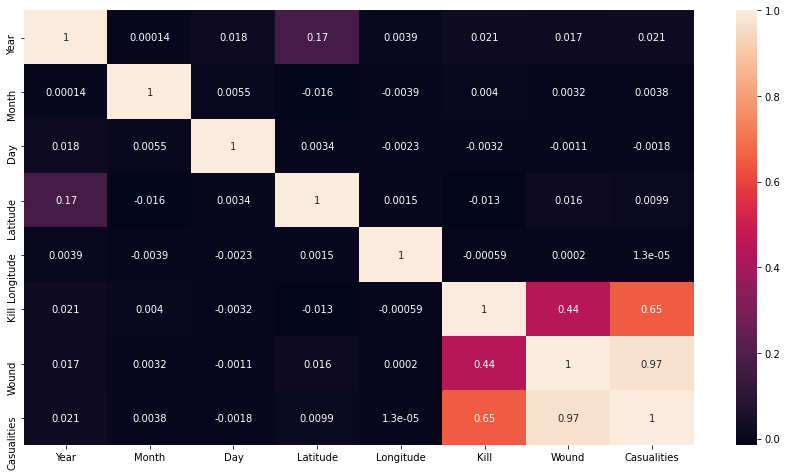

In [ ]:
plt.figure(figsize=(15,8))
col = data_df.corr()
sns.heatmap(col,annot=True)

In [ ]:
print('Total Number of people killed by terrorist attack:', int(sum(data_df.loc[:,'Kill'].dropna())))

Total Number of people killed by terror attack: 411868


In [ ]:
print('Total Number of Casuality by terrorist attack:', int(sum(data_df.loc[:,'Casualities'].dropna())))

Total Number of Casuality by terror attack: 935737


**Number of Attacks over the years**

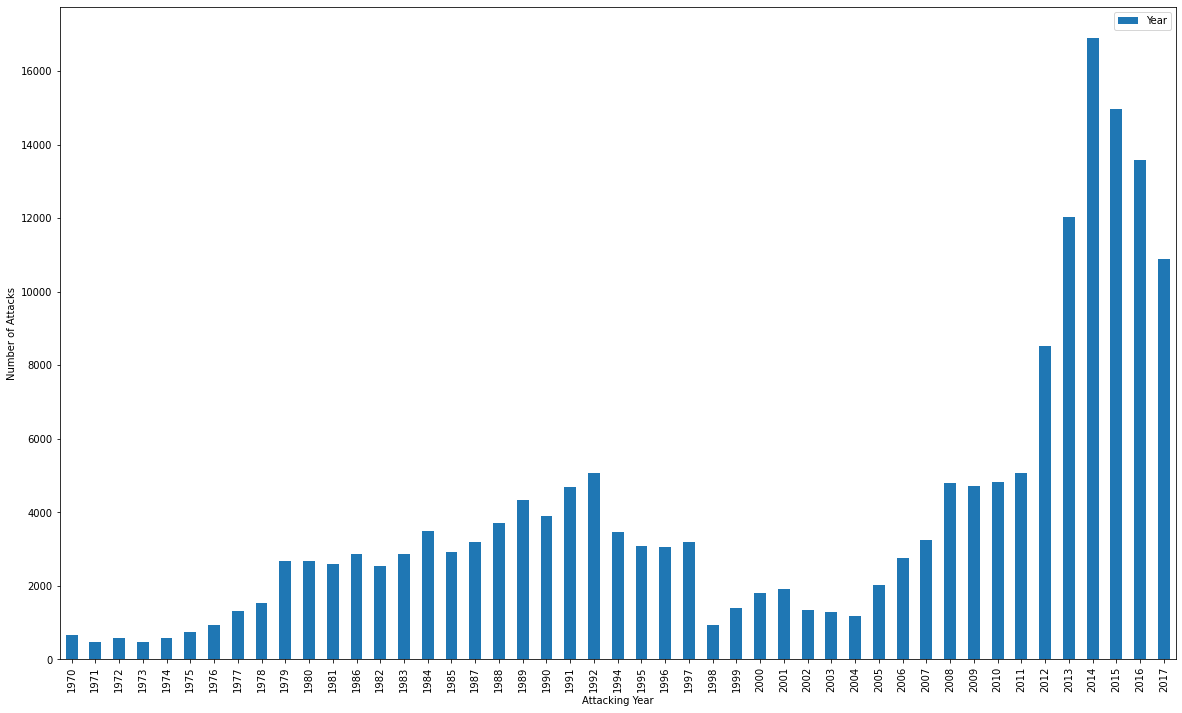

In [ ]:
yr = data_df['Year'].unique()
yrs_count = data_df['Year'].value_counts(dropna = False).sort_index()
m=pd.DataFrame(yrs_count,yr)
m.plot.bar(figsize = (20,12))
plt.xlabel('Attacking Year')
plt.ylabel('Number of Attacks')
plt.show()

We can see that terrorist activities has rapidly increased after 2005 and it was at peak in the year 2014.

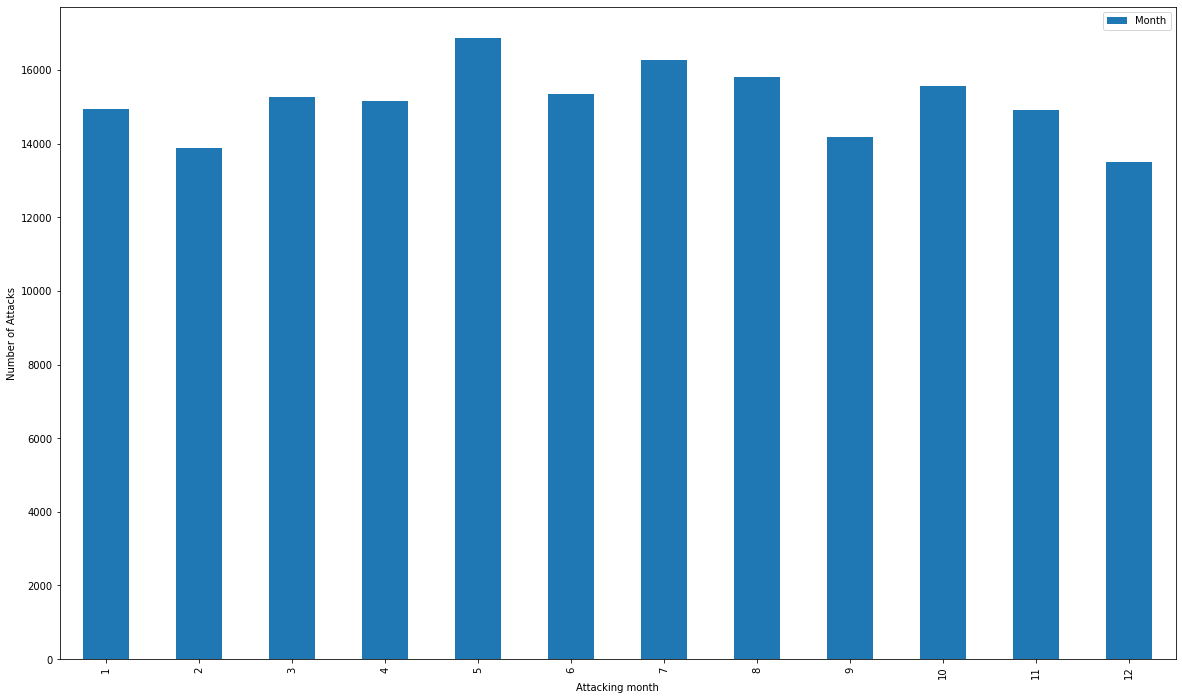

In [ ]:
mo = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mo_count = data_df['Month'].value_counts(dropna = False).sort_index()
m=pd.DataFrame(mo_count,mo)
m.plot.bar(figsize = (20,12))
plt.xlabel('Attacking month')
plt.ylabel('Number of Attacks')
plt.show()

We can see that terrorist activities are at peak in the month of May (5).

# HOTSPOT IN WORLD

**Number of attacks over different regions**

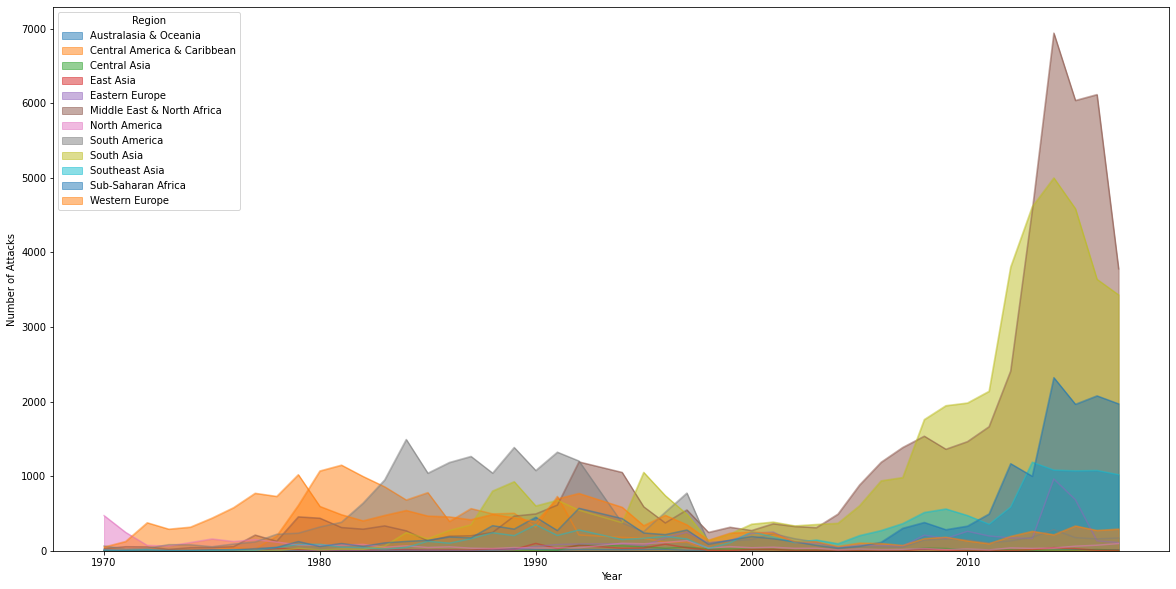

In [ ]:
pd.crosstab(data_df.Year, data_df.Region).plot.area(stacked=False,figsize=(20,10))
plt.ylabel('Number of Attacks')
plt.xlabel("Year")
plt.show()

The MIDDLE EAST AND NORTH AFRICA Region are the most affected region and SOUTH ASIA is the second most affected region due to Terrorism

**The country with the maximum number of attacks**

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


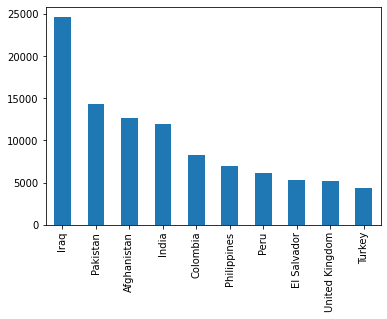

In [ ]:
print(data_df.Country.value_counts()[:10])
data_df["Country"].value_counts().head(10).plot.bar()

 Iraq is most affected country by Terrorism followed by Pakistan

**Number of attacks over different cities**

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64


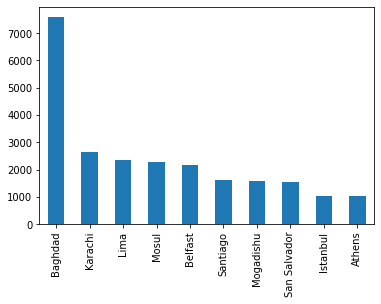

In [ ]:
print(data_df.City.value_counts()[:10])
data_df["City"].value_counts().drop('Unknown').head(10).plot.bar()

Baghdad is most affected city by Terrorism followed by Karachi

**Hotspot in India**

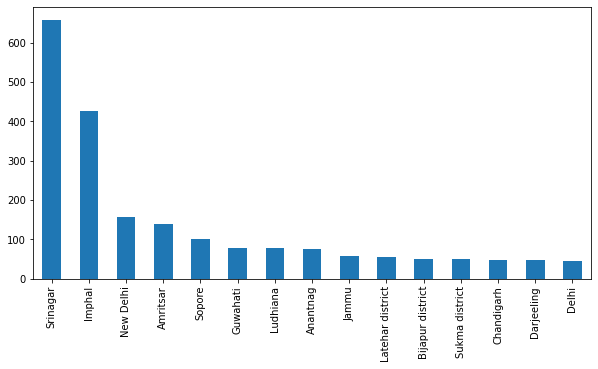

In [ ]:
grp_co = data_df.groupby('Country')
ind = grp_co.get_group('India')
ind['City'].value_counts().drop('Unknown').nlargest(15).plot.bar(figsize=(10,5))

Srinagar is most affected city in India by Terrorism followed by Imphal

**Hotspot Conclusion:**
     
     * The MIDDLE EAST AND NORTH AFRICA Region are the most affected region and SOUTH ASIA is the second most affected region due to Terrorism.
     
     * Iraq is most affected country by Terrorism followed by Pakistan.

     * Baghdad is most affected city by Terrorism followed by Karachi.

     * Srinagar is most affected city in India by Terrorism followed by Imphal.
 


**The group causing the maximum number of attacks**

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64


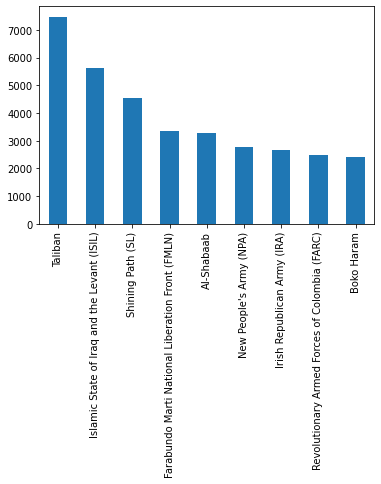

In [ ]:
print(data_df.Group.value_counts()[1:10])
data_df.Group.value_counts()[1:10].plot.bar()

Most of the attacks are planted by Taliban.

**Number of attacks with regards to the type of attack**

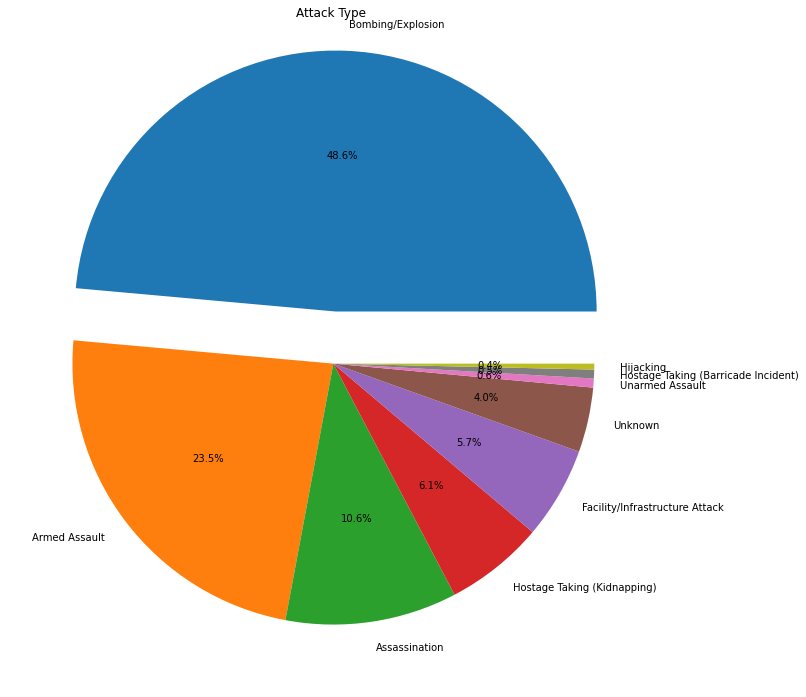

In [ ]:
data_df['Attacktype'].value_counts()
plt.figure(figsize=(12,12))
plt.title('Attack Type \n')
plt.pie(data_df['Attacktype'].value_counts(),labels=data_df['Attacktype'].value_counts().index,explode=(0.2,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
plt.show()

Most of the attacks are of attack type Bombing / Explosion 

**The number of attacks over the years with regards to the type of attack**

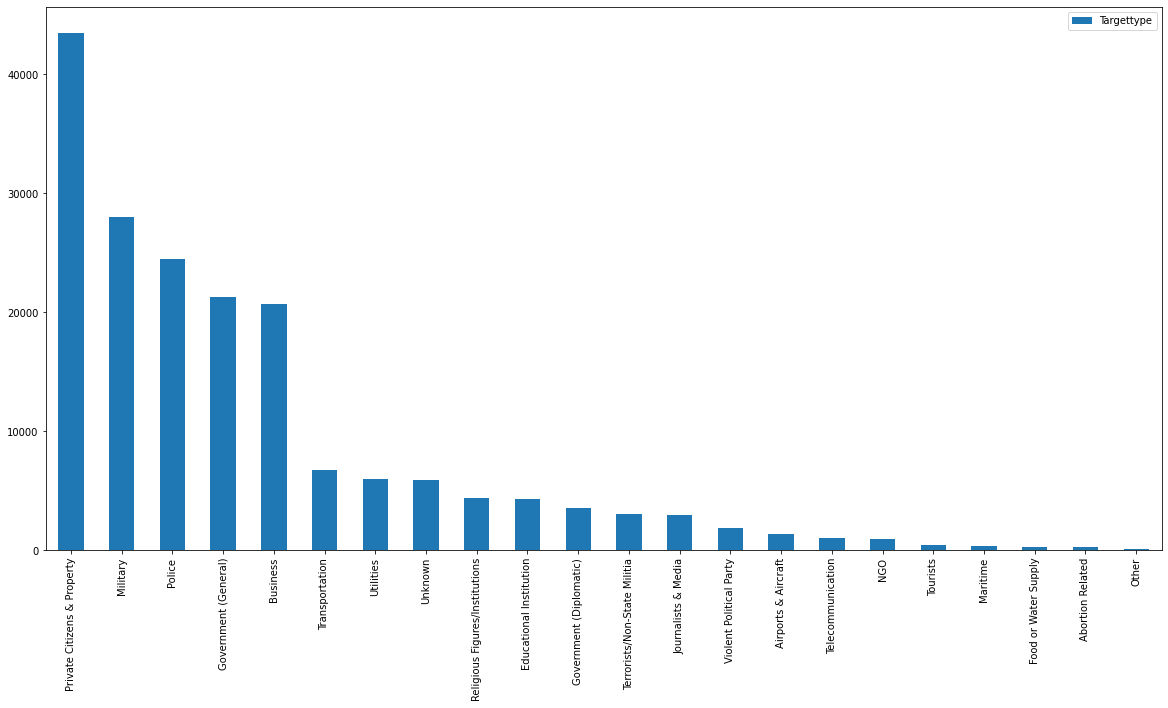

In [ ]:
k=pd.DataFrame(data_df['Targettype'].value_counts())
k.plot.bar(figsize=(20,10))

Most of the attack were on private citizens and property

**The number of attack over years with regard of Target Sub Type**

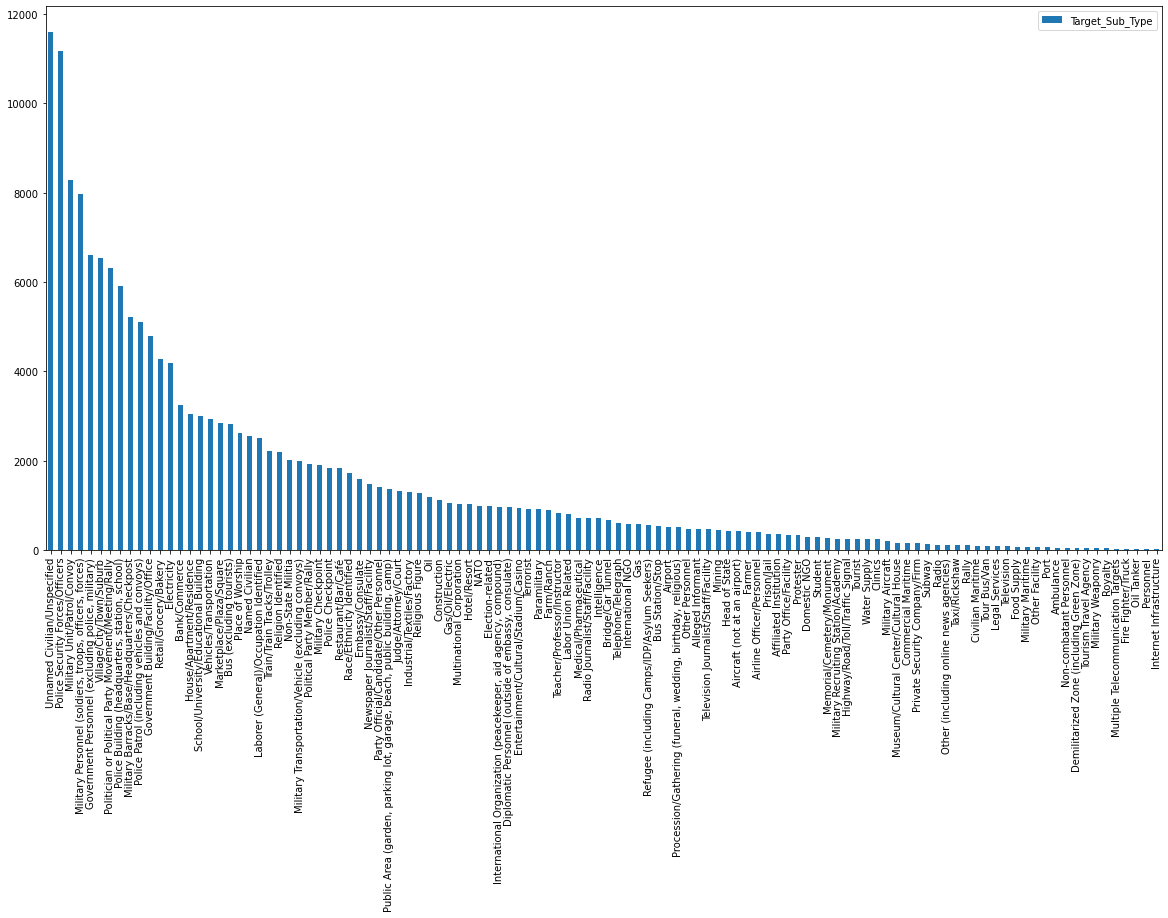

In [ ]:
k=pd.DataFrame(data_df['Target_Sub_Type'].value_counts())
k.plot.bar(figsize=(20,10))

Most of the attack were on Civilian/Unspecified

**Analysis on weapon used**

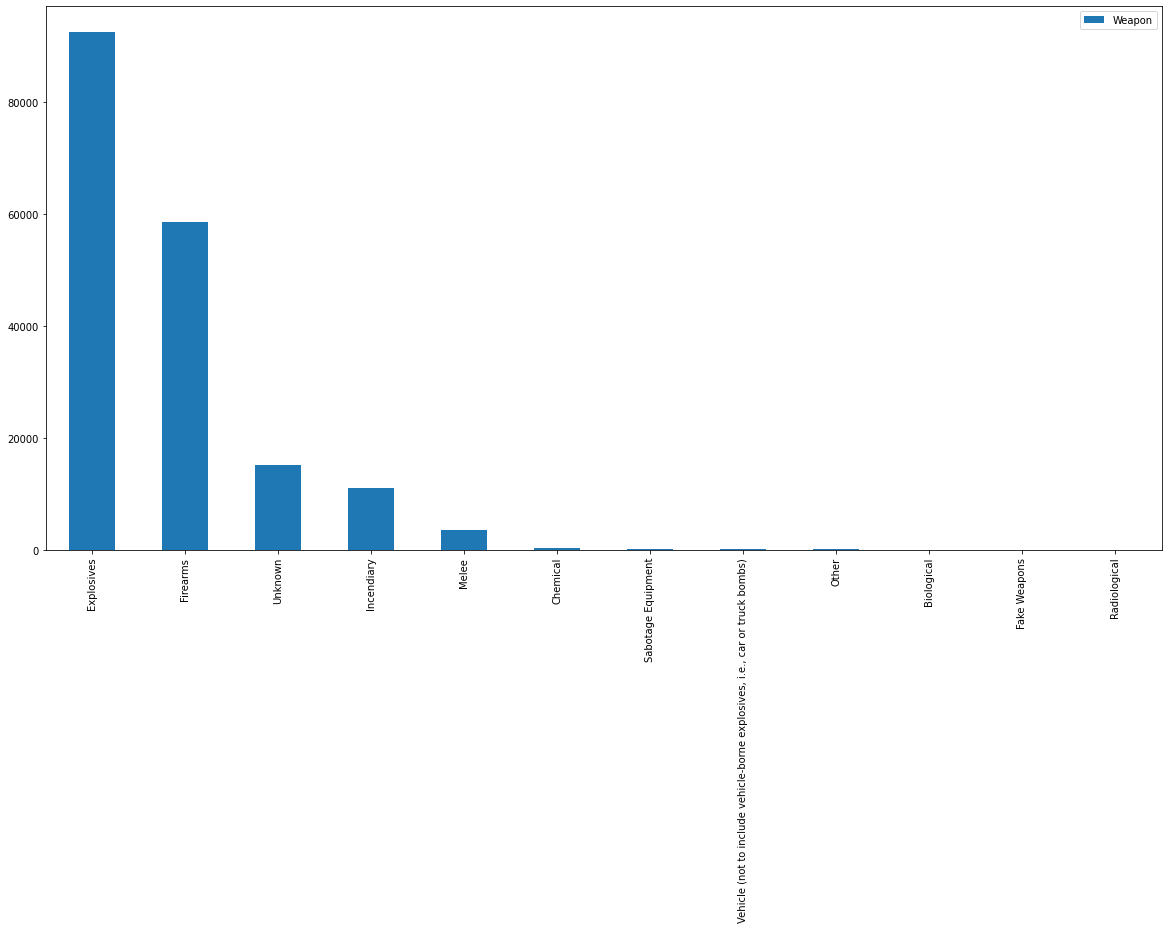

In [ ]:
k=pd.DataFrame(data_df['Weapon'].value_counts())
k.plot.bar(figsize=(20,10))

The Explosives are the most used weapon for Terrorism

**Other Insights:**

    * Most of the attacks are planted by Taliban.

    * Most of the attacks are of attack type Bombing / Explosion. 

    * Most of the attack were on private citizens and property.

    * Most of the attack were on Civilian/Unspecified.
    
    * The Explosives are the most used weapon for Terrorism.
    

# India Analysis

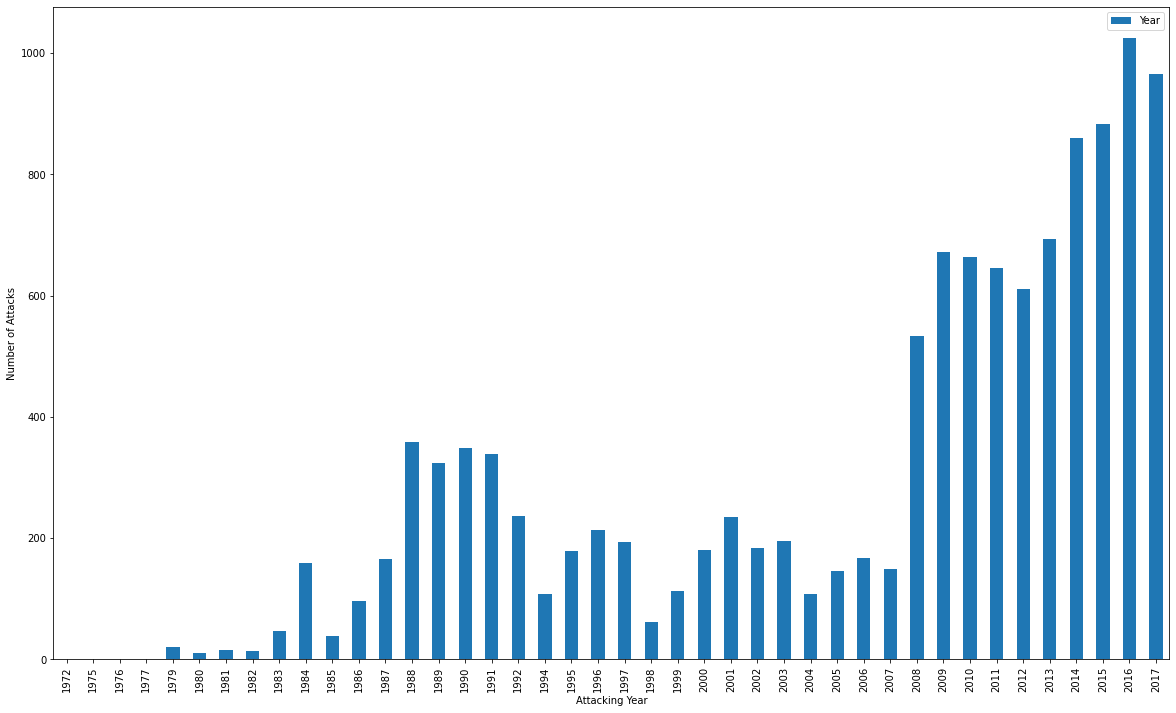

In [ ]:
m=pd.DataFrame(ind['Year'].value_counts(dropna = False).sort_index(),ind['Year'].unique())
m.plot.bar(figsize = (20,12))
plt.xlabel('Attacking Year')
plt.ylabel('Number of Attacks')
plt.show()

We can see that terrorist activities has rapidly increased after 2008 and it was at peak in the year 2016 in India.

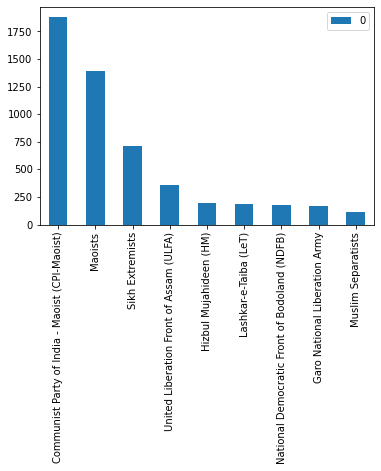

In [ ]:
m=pd.DataFrame(ind['Group'].value_counts()[1:10].values,ind['Group'].value_counts()[1:10].index)
m.plot.bar()

Most of the attacks in India are by CPI Maoist

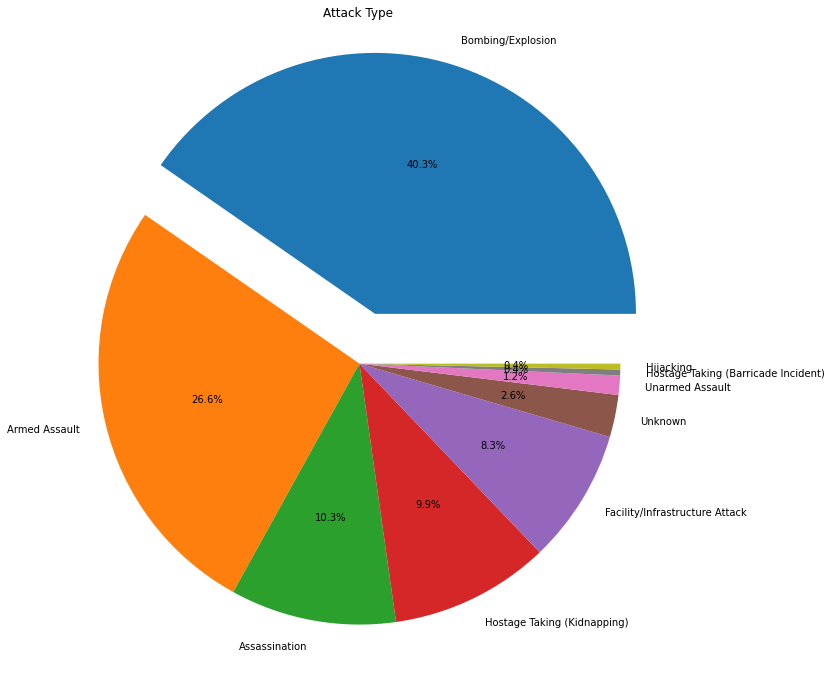

In [ ]:
ind['Attacktype'].value_counts()
plt.figure(figsize=(12,12))
plt.title('Attack Type \n')
plt.pie(ind['Attacktype'].value_counts(),labels=data_df['Attacktype'].value_counts().index,explode=(0.2,0,0,0,0,0,0,0,0),autopct='%1.1f%%')
plt.show()

 Most of the attacks are of attack type Bombing / Explosion in India. 

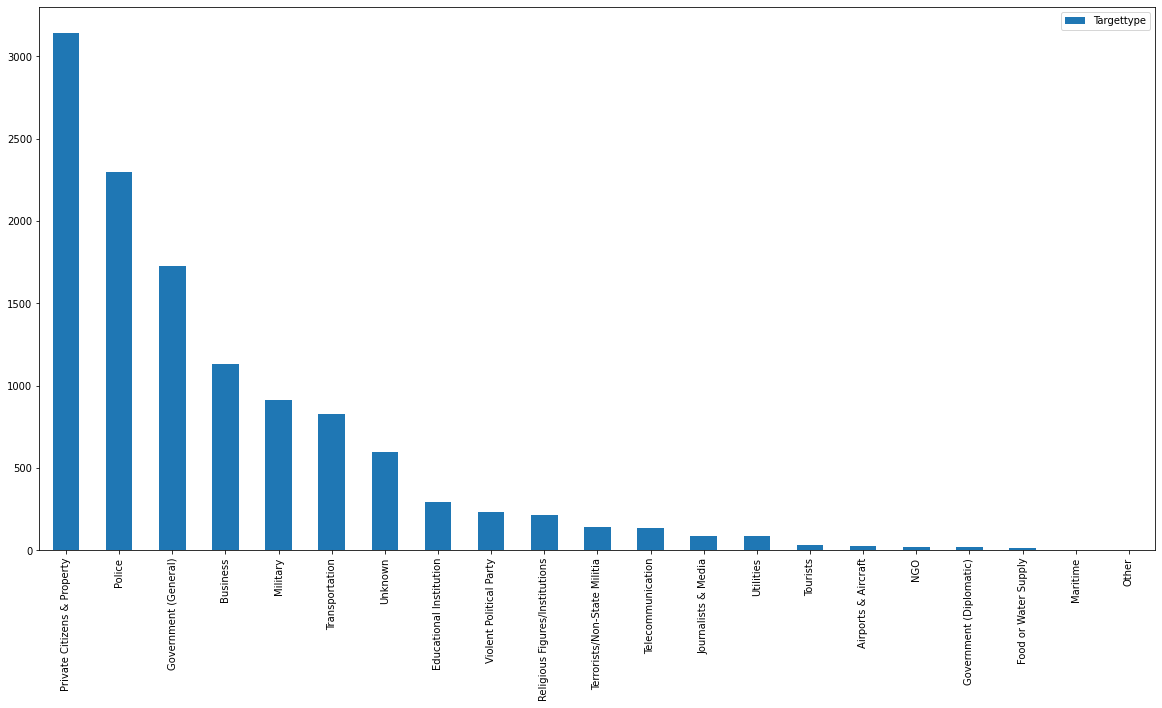

In [ ]:
k=pd.DataFrame(ind['Targettype'].value_counts())
k.plot.bar(figsize=(20,10))

Most of the attack were on private citizens and property in India.

**Weapon Analysis**

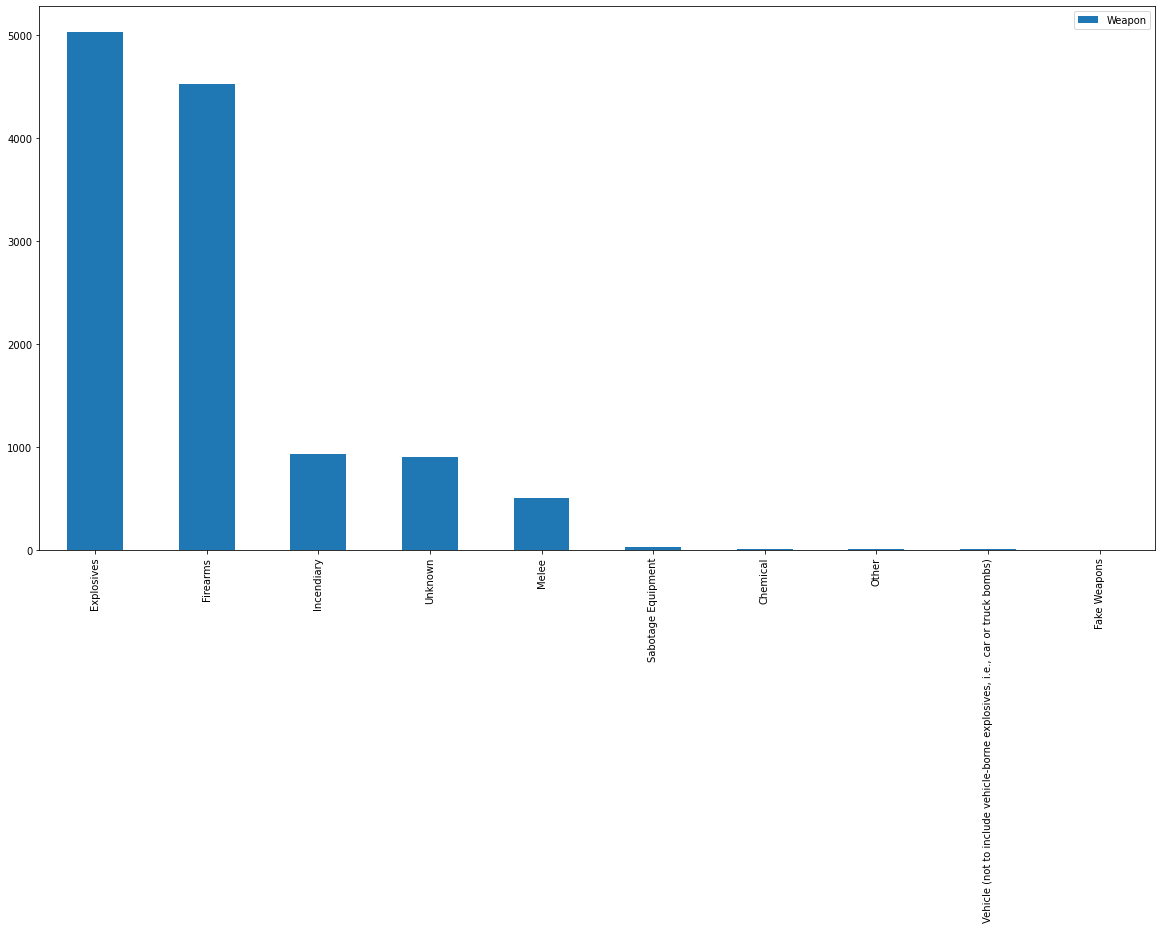

In [ ]:
k=pd.DataFrame(ind['Weapon'].value_counts())
k.plot.bar(figsize=(20,10))

The Explosives are the most used weapon for Terrorism in India too.

**other insights on India**:

    * The terrorist activities has rapidly increased after 2008 and it was at peak in the year 2016 in India.

    * Most of the attacks in India are by CPI Maoist.

    * Most of the attacks are of attack type Bombing / Explosion in India. 

    * Most of the attack were on private citizens and property in India.
    
    * The Explosives are the most used weapon for Terrorism in India too.
    